In [1]:
#required imports
import numpy as np
import matplotlib.pyplot as plt

#import data from csv (wine)/text (breast), and drop first column in breast
data = np.genfromtxt("winequality-red.csv", delimiter=';', skip_header=1)
data2 = np.genfromtxt("breast-cancer-wisconsin.data", delimiter = ',')
data2 = data2[:, 1:]

#print dimensions
r = data.shape[0]
c = data.shape[1]
r2 = data2.shape[0]
c2 = data2.shape[1]
print (r, c)
print (r2, c2)

1599 12
699 10


In [2]:
#turn labels into binary (>=6 --> 1)/(<6 --> 0)
i = 0
while i < r:
    if data[i,c-1] >= 6:
        
        data[i,c-1] = 1
    else:
        data[i,c-1] = 0
    i = i+1
#turn labels into binary (4 --> 1)/(2 --> 0)
i = 0
while i < r2:
    if data2[i,c2-1] == 2:
        data2[i,c2-1] = 0
    else:
        data2[i,c2-1] = 1
    i = i+1

In [3]:
#clean data from incorrect entries
data = data[~np.isnan(data).any(axis=1)]
data2 = data2[~np.isnan(data2).any(axis=1)]

r = data.shape[0]
c = data.shape[1]
r2 = data2.shape[0]
c2 = data2.shape[1]

#check that all entries are of type numeric
for i in range (0,r):
    for j in range (0,c):
        if type(data[i,j]) != np.float64:
            print("error")

for i in range (0,r2):
    for j in range (0,c2):
        if type(data2[i,j]) != np.float64:
            print("error")

#print new dimensions
print("----------Dimensions after cleaning Data------------")
print (r, c)
print (r2, c2)

----------Dimensions after cleaning Data------------
1599 12
683 10


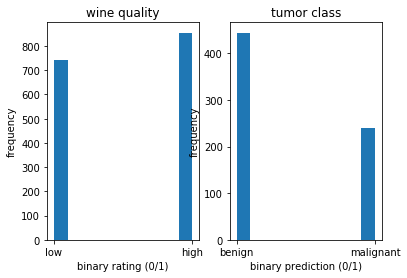

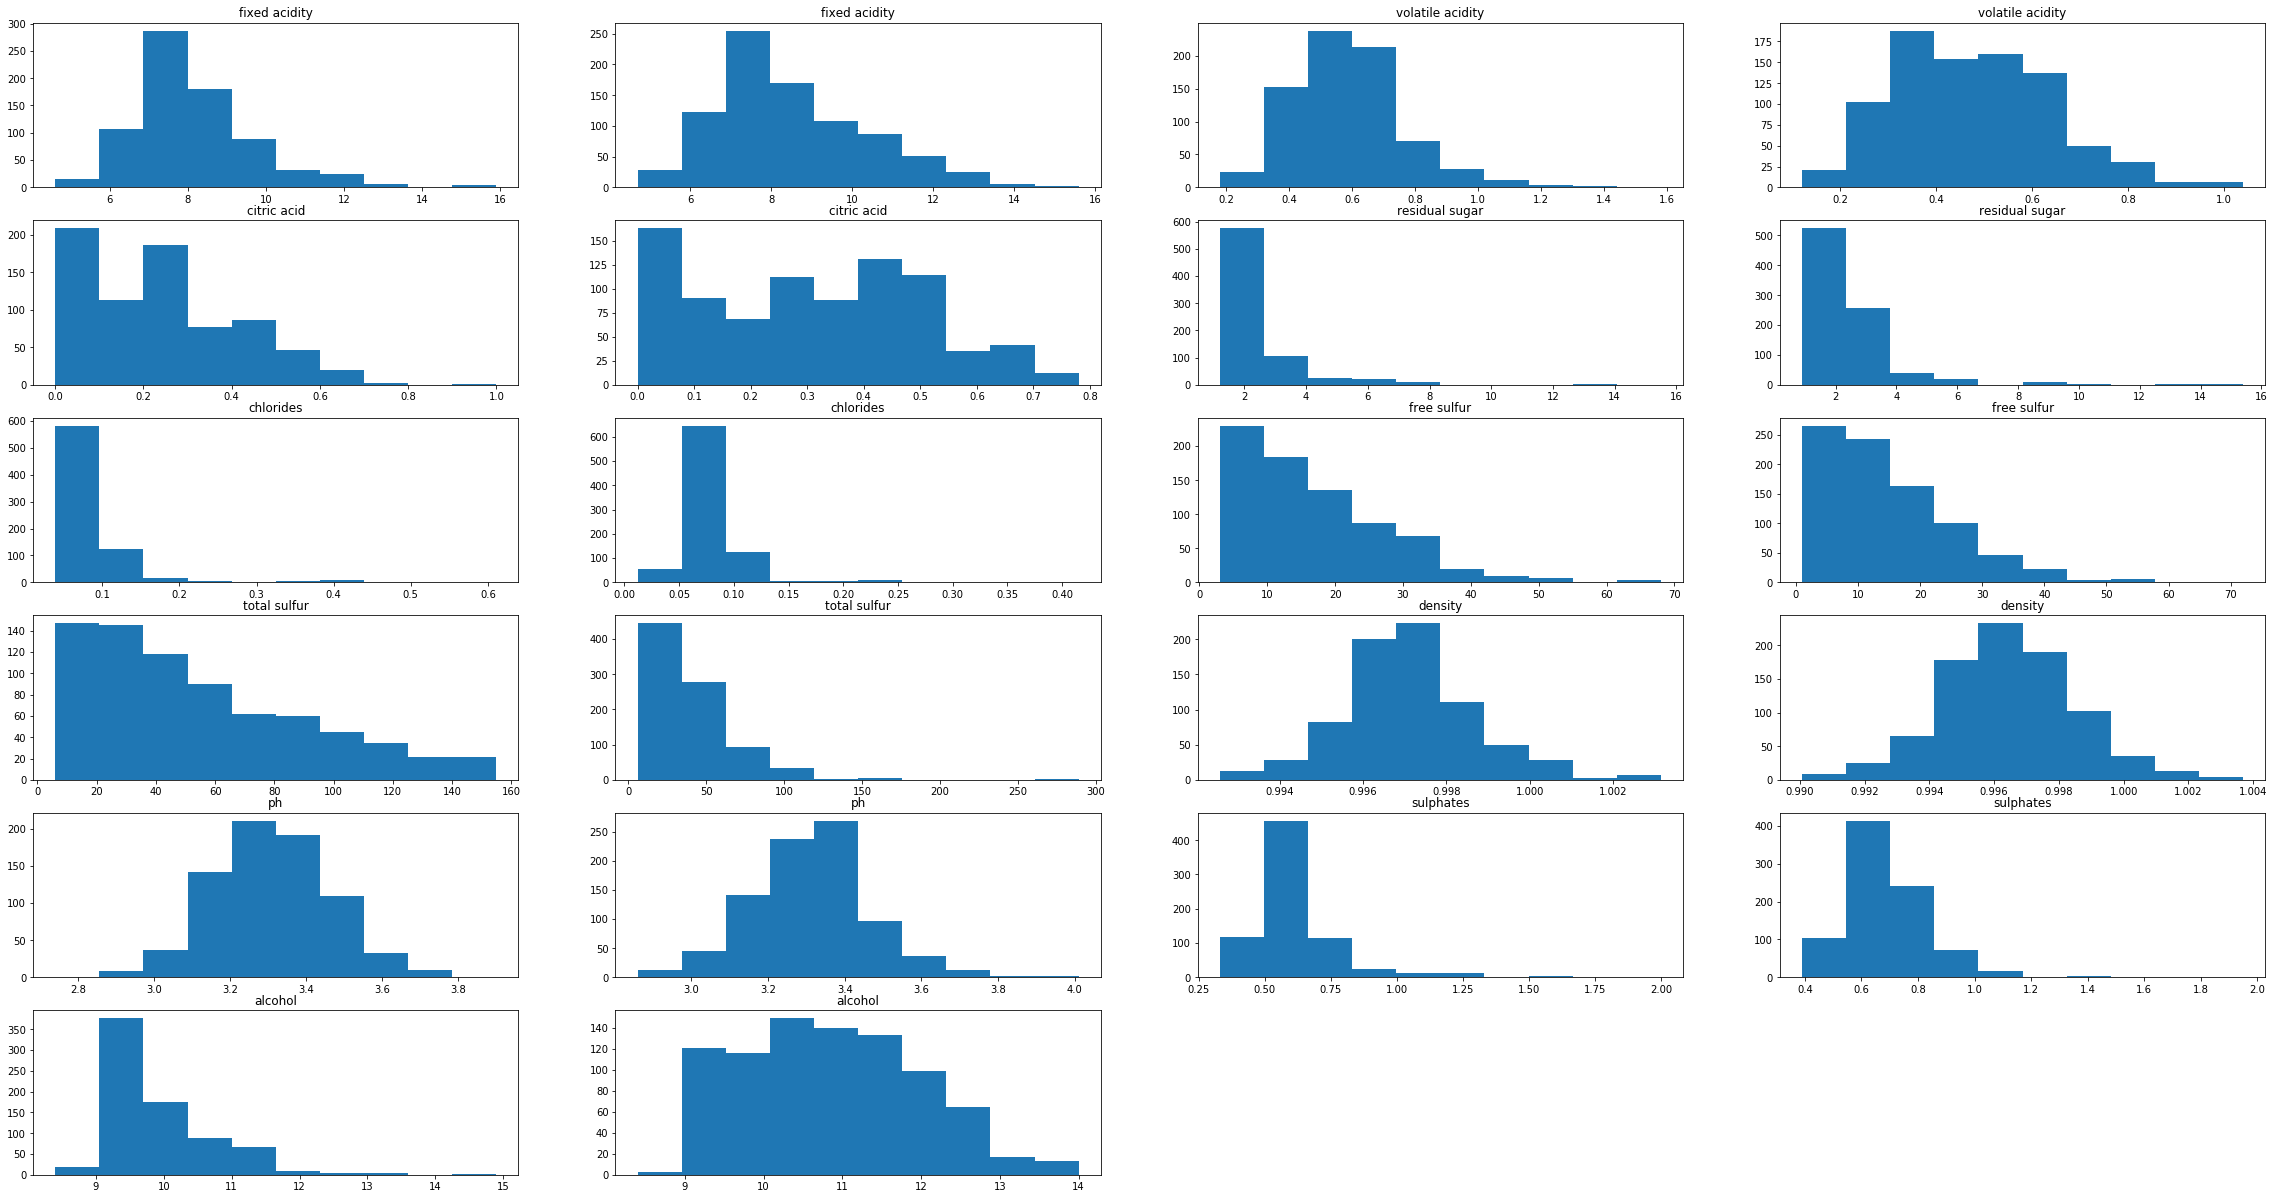

In [4]:
#plot label distribution in both data sets
plt.figure()
plt.subplot(1, 2, 1)
plt.hist(data[:, c-1])
plt.title('wine quality')
plt.xticks([0,1], ['low', 'high'])
plt.xlabel('binary rating (0/1)')
plt.ylabel('frequency')

plt.subplot(1, 2, 2)
plt.hist(data2[:, c2-1])
plt.title('tumor class')
plt.xticks([0,1], ['benign', 'malignant'])
plt.xlabel('binary prediction (0/1)')
plt.ylabel('frequency')

#More plots showing the effect of different features on labels   
X0 = np.empty([0,c])
X1 = np.empty([0,c])

for i in range(r):
    if data[i][-1] == 0:
        X0 = np.vstack((X0, data[i]))
    else:
        X1 = np.vstack((X1, data[i]))

plt.figure(figsize=(40,20))
plt.subplot(6, 4, 1)
plt.hist(X0[:, 0])
plt.title('fixed acidity')
plt.subplot(6, 4, 2)
plt.hist(X1[:, 0])
plt.title('fixed acidity')
plt.subplot(6, 4, 3)
plt.hist(X0[:, 1])
plt.title('volatile acidity')
plt.subplot(6, 4, 4)
plt.hist(X1[:, 1])
plt.title('volatile acidity')
plt.subplot(6, 4, 5)
plt.hist(X0[:, 2])
plt.title('citric acid')
plt.subplot(6, 4, 6)
plt.hist(X1[:, 2])
plt.title('citric acid')
plt.subplot(6, 4, 7)
plt.hist(X0[:, 3])
plt.title('residual sugar')
plt.subplot(6, 4, 8)
plt.hist(X1[:, 3])
plt.title('residual sugar')
plt.subplot(6, 4, 9)
plt.hist(X0[:, 4])
plt.title('chlorides')
plt.subplot(6, 4, 10)
plt.hist(X1[:, 4])
plt.title('chlorides')
plt.subplot(6, 4, 11)
plt.hist(X0[:, 5])
plt.title('free sulfur')
plt.subplot(6, 4, 12)
plt.hist(X1[:, 5])
plt.title('free sulfur')
plt.subplot(6, 4, 13)
plt.hist(X0[:, 6])
plt.title('total sulfur')
plt.subplot(6, 4, 14)
plt.hist(X1[:, 6])
plt.title('total sulfur')
plt.subplot(6, 4, 15)
plt.hist(X0[:, 7])
plt.title('density')
plt.subplot(6, 4, 16)
plt.hist(X1[:, 7])
plt.title('density')
plt.subplot(6, 4, 17)
plt.hist(X0[:, 8])
plt.title('ph')
plt.subplot(6, 4, 18)
plt.hist(X1[:, 8])
plt.title('ph')
plt.subplot(6, 4, 19)
plt.hist(X0[:, 9])
plt.title('sulphates')
plt.subplot(6, 4, 20)
plt.hist(X1[:, 9])
plt.title('sulphates')
plt.subplot(6, 4, 21)
plt.hist(X0[:, 10])
plt.title('alcohol')
plt.subplot(6, 4, 22)
plt.hist(X1[:, 10])
plt.title('alcohol')

left  = 0.125  # the left side of the subplots of the figure
right = 0.9    # the right side of the subplots of the figure
bottom = 0.1   # the bottom of the subplots of the figure
top = 0.9      # the top of the subplots of the figure
wspace = 0.2   # the amount of width reserved for blank space between subplots
hspace = 0.2   # the amount of height reserved for white space between subplots

plt.subplots_adjust(left, bottom, right, top, wspace, hspace)
plt.show()

In [5]:
#LDA Alg. implementation
import numpy as np
import math as m
import sys

class LDA:
    def __init__(self):
        self.mu_0 = 0
        self.mu_1 = 0
        self.sig = 0
        self.m = 0
        self.X_0 = 0
        self.X_1 = 0
        self.p_bin = 0

    def fit(self, X, Y):
        r = X.shape[0]
        self.m = X.shape[1]
         
        self.X_0 = np.empty([0,self.m])
        self.X_1 = np.empty([0,self.m])
                
        for i in range(r):
            if Y[i][0] == 0:
                self.X_0 = np.vstack((self.X_0, X[i]))
            else:
                self.X_1 = np.vstack((self.X_1, X[i]))
        
        self.mu_0 = np.mean(self.X_0, axis=0)
        self.mu_1 = np.mean(self.X_1, axis=0)
                
        for i in range(r):
            if Y[i][0] == 0:
                self.sig += np.dot((X[i] - self.mu_0), np.transpose(X[i] - self.mu_0))
            else:
                self.sig += np.dot((X[i] - self.mu_1), np.transpose(X[i] - self.mu_1))
        
        self.sig = self.sig / ((X.shape[0]) - 2)

    def predict(self, X, Y):
        p = m.log10(((self.X_0.shape[0]/X.shape[0])/(self.X_1.shape[0]/X.shape[0]))) - np.dot(np.transpose(self.mu_1),self.mu_1)/(2*self.sig) + np.dot(np.transpose(self.mu_0),self.mu_0)/(2*self.sig) + np.dot(X,(self.mu_1 - self.mu_0)/(self.sig))

        p_size = p.shape[0]
        self.p_bin = np.empty(p_size)

        for i in range(p_size):
            if p[i] > 0:
                self.p_bin[i] = 1    
            else:
                self.p_bin[i] = 0

        acc = model.evaluate_acc(Y,self.p_bin)
        return acc

    def evaluate_acc(self, Y, p):

        correct = 0
        total = Y.shape[0]

        for i in range(total):
            if Y[i] == p[i]:
                correct = correct + 1

        acc = (correct / total) * 100
        #print ("acc: ", acc)
        return acc

In [6]:
#LR Alg. implementation
import numpy as np
import math as m

class logisticregression:

    def __init__(self):
        self.w = [] 
        self.a = 0
        self.p = 0
        
    def fit(self, X, Y, k, learn_rate):
        
        self.w = np.zeros((X.shape[1],1))
        for i in range(k):
            self.a = np.dot(X, self.w)
            self.p = 1/(1 + (m.e)**(-(self.a)))
            e = np.dot(X.T, (Y-self.p))/X.shape[0]
            self.w = self.w + learn_rate*e
            
    def predict(self, X,Y):
        a = np.dot(X, self.w)
        p = 1/(1 + (m.e)**(-(a)))
        p_bin = np.around(p)
        acc = model.evaluate_acc(Y,p_bin)
        return acc
    
    def evaluate_acc(self, Y, p):
        correct = 0
        total = Y.shape[0]
        
        for i in range(total):
            if Y[i] == p[i]:
                correct = correct + 1

        acc = (correct / total) * 100
        #print ("acc: ", acc)
        return acc

In [7]:
#test differemt features to improve accuracy for wine dataset (feature interaction)
#data = data[:, 1:]
X = data[:, 0:c-1]
Y = data[:, c-1:c]
b = np.zeros((r,c))
b[:,:-1] = X
#print (b)
i = 0
while i < r:
    b[i,c-1] = b[i,10]*b[i,0]
    i = i+1
#print (b)
data = np.append(b, Y, axis = 1)
r = data.shape[0]
c = data.shape[1]
print (data)
print (r, c)

[[7.400e+00 7.000e-01 0.000e+00 ... 9.400e+00 6.956e+01 0.000e+00]
 [7.800e+00 8.800e-01 0.000e+00 ... 9.800e+00 7.644e+01 0.000e+00]
 [7.800e+00 7.600e-01 4.000e-02 ... 9.800e+00 7.644e+01 0.000e+00]
 ...
 [6.300e+00 5.100e-01 1.300e-01 ... 1.100e+01 6.930e+01 1.000e+00]
 [5.900e+00 6.450e-01 1.200e-01 ... 1.020e+01 6.018e+01 0.000e+00]
 [6.000e+00 3.100e-01 4.700e-01 ... 1.100e+01 6.600e+01 1.000e+00]]
1599 13


In [8]:
#k-fold validation for LDA/LR on wine dataset
import time
splitwine = np.array_split(data, 5, axis = 0)

lr = 0.0005
iter = 50000

TrainW1 = np.append(np.append(np.append(splitwine[0],splitwine[1],axis = 0),splitwine[2],axis = 0),splitwine[3],axis = 0)
TrainW2 = np.append(np.append(np.append(splitwine[0],splitwine[1],axis = 0),splitwine[2],axis = 0),splitwine[4],axis = 0)
TrainW3 = np.append(np.append(np.append(splitwine[0],splitwine[1],axis = 0),splitwine[3],axis = 0),splitwine[4],axis = 0)
TrainW4 = np.append(np.append(np.append(splitwine[0],splitwine[2],axis = 0),splitwine[3],axis = 0),splitwine[4],axis = 0)
TrainW5 = np.append(np.append(np.append(splitwine[1],splitwine[2],axis = 0),splitwine[3],axis = 0),splitwine[4],axis = 0)

TestW1 = splitwine[4]
TestW2 = splitwine[3]
TestW3 = splitwine[2]
TestW4 = splitwine[1]
TestW5 = splitwine[0]

#Seperate labels from features and print dimensions
TrainW1X = TrainW1[:, 0:c-1]
TrainW1Y = TrainW1[:, c-1:c]
TestW1X = TestW1[:, 0:c-1]
TestW1Y = TestW1[:, c-1:c]
TrainW2X = TrainW2[:, 0:c-1]
TrainW2Y = TrainW2[:, c-1:c]
TestW2X = TestW2[:, 0:c-1]
TestW2Y = TestW2[:, c-1:c]
TrainW3X = TrainW3[:, 0:c-1]
TrainW3Y = TrainW3[:, c-1:c]
TestW3X = TestW3[:, 0:c-1]
TestW3Y = TestW3[:, c-1:c]
TrainW4X = TrainW4[:, 0:c-1]
TrainW4Y = TrainW4[:, c-1:c]
TestW4X = TestW4[:, 0:c-1]
TestW4Y = TestW4[:, c-1:c]
TrainW5X = TrainW5[:, 0:c-1]
TrainW5Y = TrainW5[:, c-1:c]
TestW5X = TestW5[:, 0:c-1]
TestW5Y = TestW5[:, c-1:c]

print("-----------LDA WINE 5-fold-----------")
seconds = time.time()
model = LDA()
model.fit(TrainW1X,TrainW1Y)
p1 = model.predict(TestW1X,TestW1Y)
model = LDA()
model.fit(TrainW2X,TrainW2Y)
p2 = model.predict(TestW2X,TestW2Y)
model = LDA()
model.fit(TrainW3X,TrainW3Y)
p3 = model.predict(TestW3X,TestW3Y)
model = LDA()
model.fit(TrainW4X,TrainW4Y)
p4 = model.predict(TestW4X,TestW4Y)
model = LDA()
model.fit(TrainW5X,TrainW5Y)
p5 = model.predict(TestW5X,TestW5Y)
seconds2 = time.time()
print ((p1+p2+p3+p4+p5)/5)
print ("runtime = ", seconds2 - seconds)

print("-----------LR WINE 5-fold-----------")
seconds = time.time() 
model = logisticregression()
model.fit(TrainW1X,TrainW1Y,iter,lr)
p1 = model.predict(TestW1X,TestW1Y)
model = logisticregression()
model.fit(TrainW2X,TrainW2Y,iter,lr)
p2 = model.predict(TestW2X,TestW2Y)
model = logisticregression()
model.fit(TrainW3X,TrainW3Y,iter,lr)
p3 = model.predict(TestW3X,TestW3Y)
model = logisticregression()
model.fit(TrainW4X,TrainW4Y,iter,lr)
p4 = model.predict(TestW4X,TestW4Y)
model = logisticregression()
model.fit(TrainW5X,TrainW5Y,iter,lr)
p5 = model.predict(TestW5X,TestW5Y)
seconds2 = time.time()
print ((p1+p2+p3+p4+p5)/5)
print ("runtime = ", seconds2 - seconds)

-----------LDA WINE 5-fold-----------
62.15830721003135
runtime =  0.5288689136505127
-----------LR WINE 5-fold-----------
72.73236677115987
runtime =  90.95871090888977


In [9]:
#k-fold validation for LDA/LR on cancer dataset
splitcancer = np.array_split(data2, 5, axis = 0)

lr = 0.1
iter = 100

TrainC1 = np.append(np.append(np.append(splitcancer[0],splitcancer[1],axis = 0),splitcancer[2],axis = 0),splitcancer[3],axis = 0)
TrainC2 = np.append(np.append(np.append(splitcancer[0],splitcancer[1],axis = 0),splitcancer[2],axis = 0),splitcancer[4],axis = 0)
TrainC3 = np.append(np.append(np.append(splitcancer[0],splitcancer[1],axis = 0),splitcancer[3],axis = 0),splitcancer[4],axis = 0)
TrainC4 = np.append(np.append(np.append(splitcancer[0],splitcancer[2],axis = 0),splitcancer[3],axis = 0),splitcancer[4],axis = 0)
TrainC5 = np.append(np.append(np.append(splitcancer[1],splitcancer[2],axis = 0),splitcancer[3],axis = 0),splitcancer[4],axis = 0)

TestC1 = splitcancer[4]
TestC2 = splitcancer[3]
TestC3 = splitcancer[2]
TestC4 = splitcancer[1]
TestC5 = splitcancer[0]

#Seperate labels from features and print dimensions
TrainC1X = TrainC1[:, 0:c2-1]
TrainC1Y = TrainC1[:, c2-1:c2]
TestC1X = TestC1[:, 0:c2-1]
TestC1Y = TestC1[:, c2-1:c2]
TrainC2X = TrainC2[:, 0:c2-1]
TrainC2Y = TrainC2[:, c2-1:c2]
TestC2X = TestC2[:, 0:c2-1]
TestC2Y = TestC2[:, c2-1:c2]
TrainC3X = TrainC3[:, 0:c2-1]
TrainC3Y = TrainC3[:, c2-1:c2]
TestC3X = TestC3[:, 0:c2-1]
TestC3Y = TestC3[:, c2-1:c2]
TrainC4X = TrainC4[:, 0:c2-1]
TrainC4Y = TrainC4[:, c2-1:c2]
TestC4X = TestC4[:, 0:c2-1]
TestC4Y = TestC4[:, c2-1:c2]
TrainC5X = TrainC5[:, 0:c2-1]
TrainC5Y = TrainC5[:, c2-1:c2]
TestC5X = TestC5[:, 0:c2-1]
TestC5Y = TestC5[:, c2-1:c2]

print("-----------LDA CANCER 5-fold-----------")
seconds = time.time() 
model = LDA()
model.fit(TrainC1X,TrainC1Y)
p1 = model.predict(TestC1X,TestC1Y)
model = LDA()
model.fit(TrainC2X,TrainC2Y)
p2 = model.predict(TestC2X,TestC2Y)
model = LDA()
model.fit(TrainC3X,TrainC3Y)
p3 = model.predict(TestC3X,TestC3Y)
model = LDA()
model.fit(TrainC4X,TrainC4Y)
p4 = model.predict(TestC4X,TestC4Y)
model = LDA()
model.fit(TrainC5X,TrainC5Y)
p5 = model.predict(TestC5X,TestC5Y)
seconds2 = time.time()
print ((p1+p2+p3+p4+p5)/5)
print ("runtime = ", seconds2 - seconds)
        
print("-----------LR CANCER 5-fold-----------")
seconds = time.time() 
model = logisticregression()
model.fit(TrainC1X,TrainC1Y,iter,lr)
p1 = model.predict(TestC1X,TestC1Y)
model = logisticregression()
model.fit(TrainC2X,TrainC2Y,iter,lr)
p2 = model.predict(TestC2X,TestC2Y)
model = logisticregression()
model.fit(TrainC3X,TrainC3Y,iter,lr)
p3 = model.predict(TestC3X,TestC3Y)
model = logisticregression()
model.fit(TrainC4X,TrainC4Y,iter,lr)
p4 = model.predict(TestC4X,TestC4Y)
model = logisticregression()
model.fit(TrainC5X,TrainC5Y,iter,lr)
p5 = model.predict(TestC5X,TestC5Y)
seconds2 = time.time()
print ((p1+p2+p3+p4+p5)/5)
print ("runtime = ", seconds2 - seconds)

-----------LDA CANCER 5-fold-----------
96.34607127522543
runtime =  0.03752541542053223
-----------LR CANCER 5-fold-----------
85.22005152425933
runtime =  0.027558565139770508
